<a href="https://colab.research.google.com/github/sr606/Python-Practice/blob/main/Business_Case_Delhivery_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing the required modules and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from scipy.stats import norm,zscore,boxcox,probplot
from scipy.stats import ttest_ind,ttest_rel,mannwhitneyu,wilcoxon
from scipy.stats import shapiro,levene,kstest,anderson
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler , MinMaxScaler , OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
delhivery_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Scaler/delhivery_data.csv')

In [3]:
delhivery_data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [4]:
delhivery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [5]:
#lets make copy of the data

dd = delhivery_data.copy()
dd.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


#**🧐Exploration of Data:**

In [6]:
dd.shape

(144867, 24)

In [7]:
dd.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [8]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

#**Statastical Summary**

In [9]:
dd.describe().T

,count,mean,std,min,25%,50%,75%,max
start_scan_to_end_scan,144867.0,961.262986,1037.012769,20.000000,161.000000,449.000000,1634.000000,7898.000000
cutoff_factor,144867.0,232.926567,344.755577,9.000000,22.000000,66.000000,286.000000,1927.000000
actual_distance_to_destination,144867.0,234.073372,344.990009,9.000045,23.355874,66.126571,286.708875,1927.447705
actual_time,144867.0,416.927527,598.103621,9.000000,51.000000,132.000000,513.000000,4532.000000
osrm_time,144867.0,213.868272,308.011085,6.000000,27.000000,64.000000,257.000000,1686.000000
osrm_distance,144867.0,284.771297,421.119294,9.008200,29.914700,78.525800,343.193250,2326.199100
factor,144867.0,2.120107,1.715421,0.144000,1.604264,1.857143,2.213483,77.387097
segment_actual_time,144867.0,36.196111,53.571158,-244.000000,20.000000,29.000000,40.000000,3051.000000
segment_osrm_time,144867.0,18.507548,14.775960,0.000000,11.000000,17.000000,22.000000,1611.000000
segment_osrm_distance,144867.0,22.829020,17.860660,0.000000,12.070100,23.513000,27.813250,2191.403700


In [10]:
dd.describe(include=object).T

,count,unique,top,freq
data,144867,2,training,104858
trip_creation_time,144867,14817,2018-09-28 05:23:15.359220,101
route_schedule_uuid,144867,1504,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,1812
route_type,144867,2,FTL,99660
trip_uuid,144867,14817,trip-153811219535896559,101
source_center,144867,1508,IND000000ACB,23347
source_name,144574,1498,Gurgaon_Bilaspur_HB (Haryana),23347
destination_center,144867,1481,IND000000ACB,15192
destination_name,144606,1468,Gurgaon_Bilaspur_HB (Haryana),15192
od_start_time,144867,26369,2018-09-21 18:37:09.322207,81


#**Duplicate Detection**

In [11]:
dd[dd.duplicated()]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor


###**Insights**



The dataset does not contain any duplicates.

#**Null Detetction**

In [12]:
dd.isna().any()

,0
data,False
trip_creation_time,False
route_schedule_uuid,False
route_type,False
trip_uuid,False
source_center,False
source_name,True
destination_center,False
destination_name,True
od_start_time,False


In [13]:
dd.isnull().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


In [14]:
# dropping unkown fields


unknown_fields = ['is_cutoff', 'cutoff_factor', 'cutoff_timestamp','factor','segment_factor']
dd = dd.drop(columns= unknown_fields)

In [15]:
dd.sample

<bound method NDFrame.sample of             data          trip_creation_time  \
0       training  2018-09-20 02:35:36.476840   
1       training  2018-09-20 02:35:36.476840   
2       training  2018-09-20 02:35:36.476840   
3       training  2018-09-20 02:35:36.476840   
4       training  2018-09-20 02:35:36.476840   
...          ...                         ...   
144862  training  2018-09-20 16:24:28.436231   
144863  training  2018-09-20 16:24:28.436231   
144864  training  2018-09-20 16:24:28.436231   
144865  training  2018-09-20 16:24:28.436231   
144866  training  2018-09-20 16:24:28.436231   

                                      route_schedule_uuid route_type  \
0       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
...                                                   ...        ...   
144862  thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...    Carting   
144863  thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...    Carting   
144864  thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...    Carting   
144865  thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...    Carting   
144866  thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...    Carting   

                      trip_uuid source_center                 source_name  \
0       trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1       trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2       trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3       trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4       trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
...                         ...           ...                         ...   
144862  trip-153746066843555182  IND131028AAB  Sonipat_Kundli_H (Haryana)   
144863  trip-153746066843555182  IND131028AAB  Sonipat_Kundli_H (Haryana)   
144864  trip-153746066843555182  IND131028AAB  Sonipat_Kundli_H (Haryana)   
144865  trip-153746066843555182  IND131028AAB  Sonipat_Kundli_H (Haryana)   
144866  trip-153746066843555182  IND131028AAB  Sonipat_Kundli_H (Haryana)   

       destination_center               destination_name  \
0            IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1            IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2            IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3            IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4            IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
...                   ...                            ...   
144862       IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
144863       IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
144864       IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
144865       IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
144866       IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   

                     od_start_time                 od_end_time  \
0       2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
1       2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
2       2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
3       2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
4       2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
...                            ...                         ...   
144862  2018-09-20 16:24:28.436231  2018-09-20 23:32:09.618069   
144863  2018-09-20 16:24:28.436231  2018-09-20 23:32:09.618069   
144864  2018-09-20 16:24:28.436231  2018-09-20 23:32:09.618069   
144865  2018-09-20 16:24:28.436231  2018-09-20 23:32:09.618069   
144866  2018-09-20 16:24:28.436231  2018-09-20 23:32:09.618069   

        start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0       

In [16]:
dd.shape

(144867, 19)

In [17]:
#checking the unique values for columns

for _ in dd.columns:
  print()
  print(f'Total Unique Values in {_} column are : {dd[_].nunique()}')
  print()
  print('_'*120)


Total Unique Values in data column are : 2

________________________________________________________________________________________________________________________

Total Unique Values in trip_creation_time column are : 14817

________________________________________________________________________________________________________________________

Total Unique Values in route_schedule_uuid column are : 1504

________________________________________________________________________________________________________________________

Total Unique Values in route_type column are : 2

________________________________________________________________________________________________________________________

Total Unique Values in trip_uuid column are : 14817

________________________________________________________________________________________________________________________

Total Unique Values in source_center column are : 1508

______________________________________________________________

In [36]:
dd['route_type'].value_counts()

,count
route_type,
FTL,99660
Carting,45207


#**Changing the Datatype of Columns**

In [18]:
dd.sample()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
89471,training,2018-09-18 00:39:56.971748,thanos::sroute:f7b54136-5ef6-4109-9611-0fa63d9...,Carting,trip-153723119697141105,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND140901AAA,Chandigarh_Mullanpr_DC (Chandigarh),2018-09-18 00:39:56.971748,2018-09-18 04:23:31.103326,223.0,36.988515,85.0,43.0,44.6217,7.0,11.0,9.3515


In [19]:
dd.dtypes

,0
data,object
trip_creation_time,object
route_schedule_uuid,object
route_type,object
trip_uuid,object
source_center,object
source_name,object
destination_center,object
destination_name,object
od_start_time,object


In [20]:
# Converting the datatypes to category for columns like data and route_type as they only have 2 values.

dd['data'] = dd['data'].astype('category')
dd['route_type'] = dd['route_type'].astype('category')

# Converting time columns to datetime format
datetime_cols = ['trip_creation_time', 'od_start_time','od_end_time']
for _ in datetime_cols:
  dd[_] = pd.to_datetime(dd[_])

In [21]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [22]:
#Time period of data
dd['trip_creation_time'].max(), dd['trip_creation_time'].min() , dd['trip_creation_time'].max() - dd['trip_creation_time'].min()


(Timestamp('2018-10-03 23:59:42.701692'),
 Timestamp('2018-09-12 00:00:16.535741'),
 Timedelta('21 days 23:59:26.165951'))

In [23]:
# Time Period of data
dd['od_end_time'].max(), dd['od_end_time'].min(),dd['od_end_time'].max() - dd['od_end_time'].min()

(Timestamp('2018-10-08 03:00:24.353479'),
 Timestamp('2018-09-12 00:50:10.814399'),
 Timedelta('26 days 02:10:13.539080'))

In [24]:
data_time_frame = dd['od_end_time'].max() - dd['trip_creation_time'].min()
data_time_frame

Timedelta('26 days 03:00:07.817738')

#**⬛Null Treatment**



**Replace null values in 'source_name' and 'destination_name' columns with 'unknown' through scikit imputation**


columns_to_impute = ['source_name','destination_name']
imputer = SimpleImputer(strategy = 'constant', fill_vakue = 'unknown')
dd[columns_to_impute] = imputer.fit_tranform(dd[columns_to_impute])


but 'unknown' transactions will be more and to be omitted while analyzing ... Hence no use of imputing ...

In [25]:
dd[(dd.source_name.isna())&(dd.destination_name.isna())]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
68006,training,2018-09-26 22:21:56.619259,thanos::sroute:cfb575b8-df26-48f5-8427-6f48f9d...,FTL,trip-153800051661903546,IND331022A1B,NaN,IND331001A1C,NaN,2018-09-27 03:19:14.797080,2018-09-27 05:28:00.922915,128.0,25.178605,26.0,23.0,25.7246,26.0,23.0,25.7246
68007,training,2018-09-26 22:21:56.619259,thanos::sroute:cfb575b8-df26-48f5-8427-6f48f9d...,FTL,trip-153800051661903546,IND331022A1B,NaN,IND331001A1C,NaN,2018-09-27 03:19:14.797080,2018-09-27 05:28:00.922915,128.0,45.101167,114.0,44.0,54.6110,88.0,21.0,28.8863
68008,training,2018-09-26 22:21:56.619259,thanos::sroute:cfb575b8-df26-48f5-8427-6f48f9d...,FTL,trip-153800051661903546,IND331022A1B,NaN,IND331001A1C,NaN,2018-09-27 03:19:14.797080,2018-09-27 05:28:00.922915,128.0,50.844665,128.0,49.0,60.9205,13.0,4.0,6.3096


even if we replace these nulls with some values, those are not gonna have any impact on the data.... so we can drop it as well..

In [26]:
len(delhivery_data)

144867

In [27]:
dd.isna().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


In [28]:
293+261

554

In [29]:
df = dd.dropna()

In [30]:
df.isna().sum().any()

False

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  category      
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  category      
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetime64[n

##**Insights:**



*   Only two fields have tiny fractions of missing values, less than 0.05% of whole dataset.

*   Since we have plenty of data to work with, we're good to drop the null values instead of trying to guess them and using methods like average, more common values.

*   Im dropping missing values to keep things simple and not mess up how features are spread out. But if lot of data was missing, we could have used other methods like guessing based on whats there or using the most common values.






#**Exploratory Data Analysis:**

In [32]:
cp = ['gray','red','dimgrey','tomato','dimgray','orangered','k','salmon','gray','red','dimgrey','tomato','dimgray','orangered','k','salmon']

In [33]:
df.sample()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
105669,training,2018-09-18 19:46:19.254695,thanos::sroute:0c9755a6-d0b7-4dd0-b3a6-b5ea8d0...,Carting,trip-153729997925447945,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND201301AAM,Noida_Sector63_L (Uttar Pradesh),2018-09-18 19:46:19.254695,2018-09-19 00:28:21.109434,282.0,28.695692,50.0,39.0,34.4706,11.0,10.0,9.8494


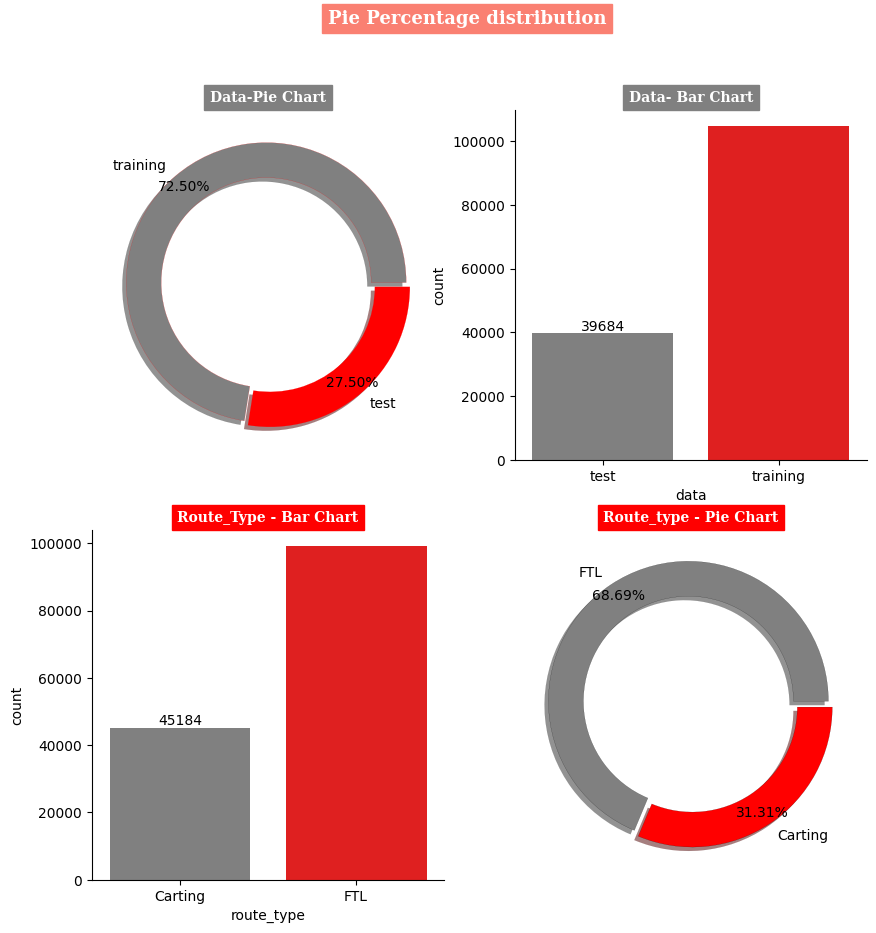

In [34]:
plt.figure(figsize=(10,10))
plt.suptitle('Pie Percentage distribution',fontsize=13,fontfamily='serif',fontweight='bold',backgroundcolor=cp[-1],color='w')

plt.subplot(221)
plt.pie(df['data'].value_counts(), labels=df['data'].value_counts().index, colors=cp,counterclock=True , explode=(0.02,0.02) , autopct='%.2f%%', pctdistance=0.905,
       textprops={'color':'k','fontsize':10} , shadow=True, radius=1,wedgeprops=dict(edgecolor='r',linewidth=0.1,width=0.25))
plt.title('Data-Pie Chart',fontsize=10,fontfamily='serif',fontweight='bold',backgroundcolor=cp[0],color='w')

plt.subplot(222)
a = sns.barplot(x=df['data'].value_counts().index, y=df['data'].value_counts(), palette=cp)
a.bar_label(a.containers[0], label_type='edge',fmt='%d')
plt.title('Data- Bar Chart',fontsize=10,fontfamily='serif',fontweight='bold',backgroundcolor=cp[0],color='w')

plt.subplot(223)
b = sns.barplot(x=df['route_type'].value_counts().index, y=df['route_type'].value_counts(), palette=cp)
b.bar_label(b.containers[0], label_type='edge',fmt='%d')
plt.title('Route_Type - Bar Chart',fontsize=10,fontfamily='serif',fontweight='bold',backgroundcolor=cp[1],color='w')

plt.subplot(224)
plt.pie(df['route_type'].value_counts(), labels=df['route_type'].value_counts().index, colors=cp,counterclock=True , explode=(0.03,0.02) , autopct='%.2f%%', pctdistance=0.905,
       textprops={'color':'k','fontsize':10} , shadow=True, radius=1,wedgeprops=dict(edgecolor='k',linewidth=0.1,width=0.25))
plt.title('Route_type - Pie Chart',fontsize=10,fontfamily='serif',fontweight='bold',backgroundcolor=cp[1],color='w')

sns.despine()
plt.show()

**Trip Segment Analysis:**
delivery details of one package is divided into several rows (think of it as connecting flights to reach a particular destination) we should find way to identify unique trip details for source_destination to understand delivery data.
we can create unique identifier for different segment of a trip based on combination of trip_uuid, source_center and destination_center, we will call it as segment key

Based on segment_key we will create new aggregated columns segment_actual_time,segment_osrm_distance,segment_osrm_time


In [37]:
df['segment_key']=df.apply(lambda x:"#".join([x['trip_uuid'],x['source_center'],x['destination_center']]), axis=1)

In [38]:
df['segment_actual_time_cumsum']=df.groupby('segment_key')['segment_actual_time'].transform(lambda x:x.cumsum())

df['segment_osrm_time_cumsum']=df.groupby('segment_key')['segment_osrm_time'].transform(lambda x:x.cumsum())

df['segment_osrm_distance_cumsum']=df.groupby('segment_key')['segment_osrm_distance'].transform(lambda x:x.cumsum())

In [39]:
df['segment_actual_time_sum']=df.groupby('segment_key')['segment_actual_time_cumsum'].transform(lambda x:x.iloc[-1])
df['segment_osrm_time_sum']=df.groupby('segment_key')['segment_osrm_time_cumsum'].transform(lambda x:x.iloc[-1])
df['segment_osrm_distance_sum']=df.groupby('segment_key')['segment_osrm_distance_cumsum'].transform(lambda x:x.iloc[-1])

In [40]:
df=df.sort_values(by=['segment_key','od_end_time'])
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_key,segment_actual_time_cumsum,segment_osrm_time_cumsum,segment_osrm_distance_cumsum,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
125002,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,50.0,33.0,38.0620,trip-153671041653548748#IND209304AAA#IND000000ACB,50.0,33.0,38.0620,728.0,534.0,670.6205
125003,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,9.0,8.0,10.9921,trip-153671041653548748#IND209304AAA#IND000000ACB,59.0,41.0,49.0541,728.0,534.0,670.6205
125004,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,34.0,22.0,30.6308,trip-153671041653548748#IND209304AAA#IND000000ACB,93.0,63.0,79.6849,728.0,534.0,670.6205
125005,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,25.0,17.0,25.0959,trip-153671041653548748#IND209304AAA#IND000000ACB,118.0,80.0,104.7808,728.0,534.0,670.6205
125006,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,20.0,14.0,21.0389,trip-153671041653548748#IND209304AAA#IND000000ACB,138.0,94.0,125.8197,728.0,534.0,670.6205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86464,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,...,8.0,6.0,6.4998,trip-153861115439069069#IND628801AAA#IND628204AAA,29.0,14.0,16.0184,29.0,14.0,16.0184
11572,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,...,45.0,17.0,23.9866,trip-153861118270144424#IND583119AAA#IND583101AAA,45.0,17.0,23.9866,233.0,42.0,52.5303
11573,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,...,188.0,25.0,28.5437,trip-153861118270144424#IND583119AAA#IND583101AAA,233.0,42.0,52.5303,233.0,42.0,52.5303
11570,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583201AAA,Hospet (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-10-04 02:51:44.712656,...,30.0,21.0,23.2367,trip-153861118270144424#IND583201AAA#IND583119AAA,30.0,21.0,23.2367,41.0,25.0,28.0484


#**Feature Engineering:**

In [41]:
df['od_time_diff_hour']=(df['od_end_time']-df['od_start_time'])/pd.Timedelta(hours=1)

Extract City, Place, Code and State Information

In [42]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_key',
       'segment_actual_time_cumsum', 'segment_osrm_time_cumsum',
       'segment_osrm_distance_cumsum', 'segment_actual_time_sum',
       'segment_osrm_time_sum', 'segment_osrm_distance_sum',
       'od_time_diff_hour'],
      dtype='object')

In [43]:
df['trip_creation_year']=df['trip_creation_time'].dt.year
df['trip_creation_month']=df['trip_creation_time'].dt.month
df['trip_creation_day']=df['trip_creation_time'].dt.day

In [44]:
def get_state(name):
    pattern="\([A-Za-z]+\s?\w+\)"
    pattern="\([A-Za-z &]+\s?\w+\)"
    state=re.findall(pattern, name)[0]
    state=state.replace("(","")
    state=state.replace(")","")
    return state

In [45]:
def get_city(name):
    pattern="\([A-Za-z &]+\s?\w+\)"
    state=re.findall(pattern, name)[0]
    city_place_code=name.replace(state,'')
    city_place_code_parts=city_place_code.split("_")
    if len(city_place_code_parts)==1 :
        city=city_place_code_parts[0].strip()
    elif len(city_place_code_parts)==2:
        city=city_place_code.strip()
    elif len(city_place_code_parts)==3 or len(city_place_code_parts)==4:
        city=city_place_code_parts[0].strip()
    else:
        city=city_place_code
    return city

In [46]:
def get_place(name):
    pattern="\([A-Za-z &]+\s?\w+\)"
    try:
        state=re.findall(pattern, name)[0]
        city_place_code=name.replace(state,'')
        city_place_code_parts=city_place_code.split("_")
        if len(city_place_code_parts)==3 or len(city_place_code_parts)==4:
            place=city_place_code_parts[1].strip()
        else:
            place=None
        return place
    except Exception as exp:
        return None

In [47]:
def get_code(name):
    pattern="\([A-Za-z &]+\s?\w+\)"
    try:
        state=re.findall(pattern, name)[0]
        city_place_code=name.replace(state,'')
        city_place_code_parts=city_place_code.split("_")
        if len(city_place_code_parts)==3 :
            code=city_place_code_parts[2].strip()
        elif  len(city_place_code_parts)==4:
            code="_".join(city_place_code_parts[2:]).strip()
        else:
            code=None
        return code
    except Exception as exp:
        return None

In [48]:
df['destination_state']=df['destination_name'].map(get_state)
df['source_state']=df['source_name'].map(get_state)

In [49]:
df['destination_city']=df['destination_name'].map(get_city)
df['source_city']=df['source_name'].map(get_state)

In [50]:
df['destination_place']=df['destination_name'].map(get_place)
df['source_place']=df['source_name'].map(get_place)

In [51]:
df['destination_code']=df['destination_name'].map(get_code)
df['source_code']=df['source_name'].map(get_code)